In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
giris = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
cikis = np.array([0, 1, 1, 0]) 



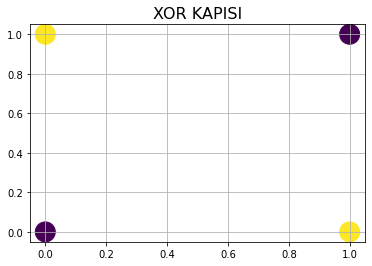

In [3]:
plt.title('XOR KAPISI', fontsize=16)
plt.scatter(giris[:,1], giris[:,0], s=400, c = cikis)
plt.grid() 
plt.show()

In [4]:

class Perceptron(object): 
    def __init__(self, ogrenme_orani=0.1, iter_sayisi=10):
        self.ogrenme_orani = ogrenme_orani
        self.iter_sayisi = iter_sayisi

    def ogren(self, X, y):
        self.w = np.zeros(1 + X.shape[1])
       # self.w = np.random.rand((1 + X.shape[1])) * 2
        self.hatalar = []
        for _ in range(self.iter_sayisi):
            hata = 0
            for xi, hedef in zip(X, y):
                degisim = self.ogrenme_orani * (hedef - self.tahmin(xi))
                self.w[1:] += degisim * xi
                self.w[0] += degisim 
                hata += int(degisim == 0.0)
            self.hatalar.append(hata)
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def tahmin(self, x):
        return np.where(self.net_input(x) == 0.0, 1, -1)

In [5]:
siniflandirici = Perceptron(ogrenme_orani=0.1, iter_sayisi=10)

In [6]:
siniflandirici.ogren(giris, cikis)

In [7]:
siniflandirici.w
     

array([5.6, 2.8, 2.6])

In [8]:
siniflandirici.hatalar

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

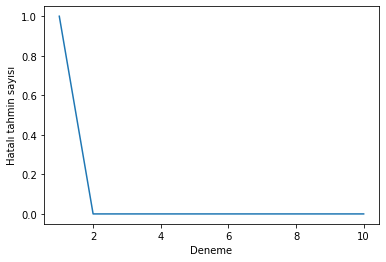

In [9]:
plt.plot(range(1, len(siniflandirici.hatalar) + 1), siniflandirici.hatalar)
plt.xlabel('Deneme')
plt.ylabel('Hatalı tahmin sayısı')
plt.show()